In [1]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt


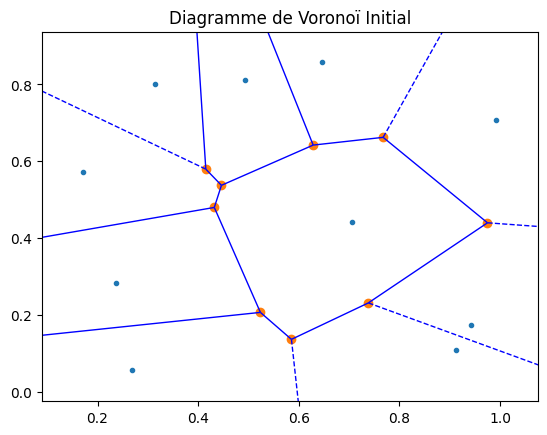

In [2]:
points = np.random.rand(10, 2)  # 10 sites initiaux
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.set_title('Diagramme de Voronoï Initial')
plt.show()


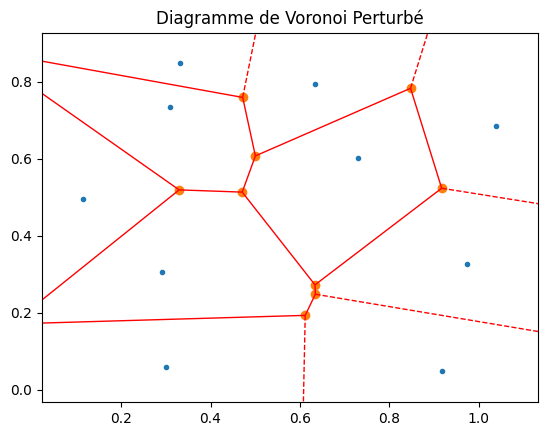

In [3]:
# Étape 3 : Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

# Étape 4 : Calcul du nouveau diagramme de Voronoi
voronoi_perturbed = Voronoi(points_perturbed)

# Affichage du nouveau diagramme
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagramme de Voronoi Perturbé')
plt.show()

initial (11, 2)
perturbed (11, 2)
Différences des sommets: [3.7408355  0.30784418 0.12818481 0.69743339 0.49426422 1.05401597
 0.3882936  0.88836824 0.19550568 0.61107863 0.11796186]


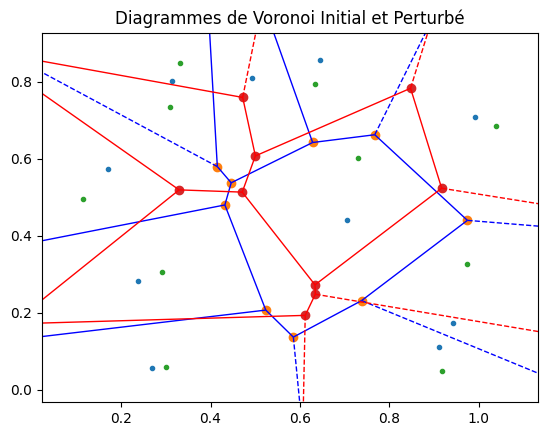

In [4]:
# Étape 5 : Comparaison des sommets
initial_vertices = voronoi_initial.vertices
perturbed_vertices = voronoi_perturbed.vertices


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

if initial_vertices.shape == perturbed_vertices.shape:
    vertex_differences = np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)
    print("Différences des sommets:", vertex_differences)
else:
    print("Les diagrammes de Voronoi ont un nombre différent de sommets.")

# Affichage des deux diagrammes pour visualisation
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoi Initial et Perturbé')
plt.show()

APPROCHE ITÉRATIVE DE CORRECTION

----------------------------------------------------------------

In [5]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cost_function(perturbed_vertices_falt, initial_points, perturbed_points, alpha=1.0):
    #if initial_vertices.shape != perturbed_vertices.shape:
        #return np.inf
    perturbed_vertices = perturbed_vertices_falt.reshape(-1, 2)
    initial_vertices = Voronoi(initial_points).vertices
    # Calculate the total squared distance between corresponding vertices
    vertex_difference = np.sum(np.linalg.norm(initial_vertices - perturbed_vertices, axis=1)**2)
    # Regularization term to keep perturbed points close to initial points
    regularization_term = np.sum(np.linalg.norm(Voronoi(initial_points).vertices -  Voronoi(perturbed_points).vertices, axis=1)**2)
    return vertex_difference + alpha * regularization_term

    #return vertex_difference



initial (13, 2)
perturbed (13, 2)


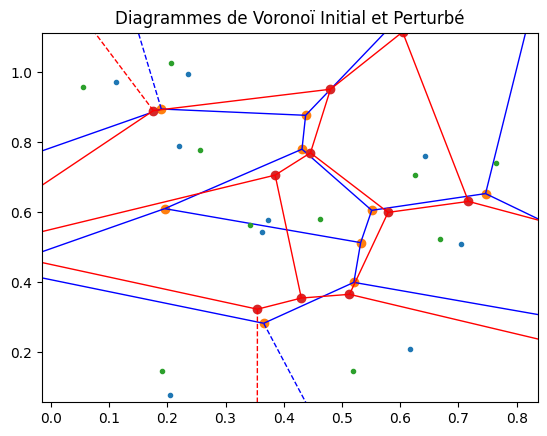

In [6]:
# Initialisation des sites
np.random.seed()  # Pour la reproductibilité
points = np.random.rand(10, 2)  # 10 sites initiaux

# Calcul du diagramme de Voronoï initial
voronoi_initial = Voronoi(points)
initial_vertices = voronoi_initial.vertices


# Perturbation des positions des sites
perturbation = np.random.normal(scale=0.05, size=points.shape)
points_perturbed = points + perturbation

voronoi_perturbed = Voronoi(points_perturbed)
perturbed_vertices = voronoi_perturbed.vertices

print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)

# Affichage des diagrammes initial et perturbé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_perturbed, ax=ax, show_vertices=True, line_colors='red')
ax.set_title('Diagrammes de Voronoï Initial et Perturbé')
plt.show()


initial (13, 2)
perturbed (13, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           26     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54196D+01    |proj g|=  1.22899D+01
Positions mises à jour : [ 0.35632309  0.31686123 -0.0209773   0.66796024 -0.03921058  0.48379178
  0.25649812  0.85677637  6.65062932 -2.03987611  0.39259213  0.72989733
  0.3963346   0.43053047  0.36014883  0.37705058  0.50548665  1.01990056
  0.44016914  0.90326564  0.44384233  0.7709869   0.69115276  0.61409104
  0.57525417  0.60009481]

At iterate    1    f=  4.22236D+01    |proj g|=  1.05584D+01


 This problem is unconstrained.


<Figure size 640x480 with 0 Axes>

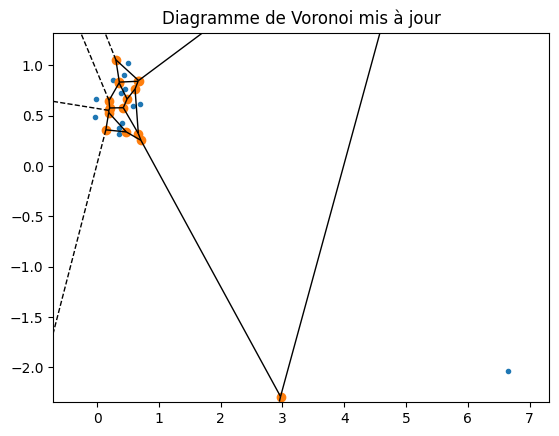

Positions mises à jour : [ 0.3655931   0.28225036  0.90021731  1.68056821  0.52042964  0.39923423
  0.74661724  0.6530415   1.3714261   0.15160604  0.4375808   0.87682222
  0.18977298  0.89476048 -0.57140206  0.45028415 -0.09583539  0.43952001
  0.19563504  0.61001364  0.43135195  0.77994844  0.53214108  0.51287271
  0.55110966  0.60516163]

At iterate    2    f=  5.03814D+00    |proj g|=  5.95080D-06


<Figure size 640x480 with 0 Axes>

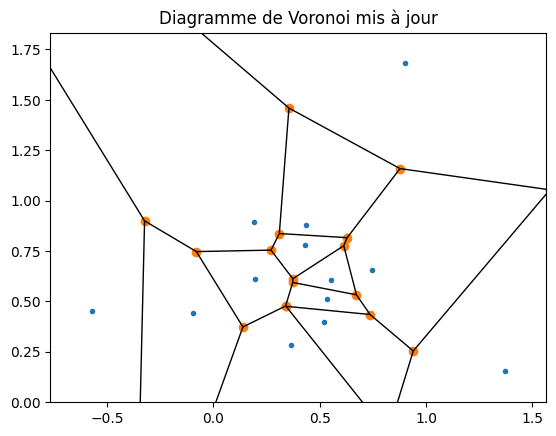


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   26      2      3      1     0     0   5.951D-06   5.038D+00
  F =   5.0381423923990880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


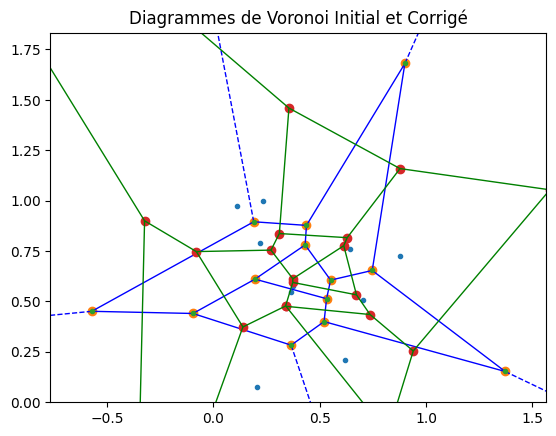

In [7]:
# Fonction de rappel pour la minimisation
def callback(xk):
    print("Positions mises à jour :", xk)
    plt.figure()
    vor = Voronoi(xk.reshape(-1, 2))
    voronoi_plot_2d(vor)
    plt.title("Diagramme de Voronoi mis à jour")
    plt.show()


print("initial",initial_vertices.shape)
print("perturbed",perturbed_vertices.shape)
# Minimisation de la fonction de coût
result = minimize(
    cost_function,
    perturbed_vertices.flatten(),
    args=(voronoi_initial.points, voronoi_perturbed.points, 0.1),
    method='L-BFGS-B',
    callback=callback,
    options={'disp': True}
)

# Résultats finaux
corrected_points = result.x.reshape(-1, 2)
voronoi_corrected = Voronoi(corrected_points)

# Affichage du diagramme de Voronoï corrigé
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
voronoi_plot_2d(voronoi_corrected, ax=ax, show_vertices=True, line_colors='green')
ax.set_title('Diagrammes de Voronoi Initial et Corrigé')
plt.show()